In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv import SDV
from sdv import Metadata
from matplotlib import pyplot as plt

In [2]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/SDV/E_PimaIndiansDiabetes_Synthetic_SDV.csv'

## 1. Read data

In [3]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_columns = ['Outcome']
for c in categorical_columns :
    real_data[c] = real_data[c].astype('category')
real_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84,0,0,0,0.0,0.304,21,0
1,9,112,82,24,0,28.2,1.282,50,1
2,1,139,46,19,83,28.7,0.654,22,0
3,0,161,50,0,0,21.9,0.254,65,0
4,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
609,5,139,64,35,140,28.6,0.411,26,0
610,1,96,122,0,0,22.4,0.207,27,0
611,10,101,86,37,0,45.6,1.136,38,1
612,0,141,0,0,0,42.4,0.205,29,1


In [4]:
real_data.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

### 1.1. Create metada

In [5]:
metadata = Metadata()
metadata.add_table(name='data', data=real_data, primary_key='')
metadata

Metadata
  root_path: .
  tables: ['data']
  relationships:

In [6]:
tables = dict()
tables['data'] = real_data
tables

{'data':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              2       84              0              0        0   0.0   
 1              9      112             82             24        0  28.2   
 2              1      139             46             19       83  28.7   
 3              0      161             50              0        0  21.9   
 4              6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 609            5      139             64             35      140  28.6   
 610            1       96            122              0        0  22.4   
 611           10      101             86             37        0  45.6   
 612            0      141              0              0        0  42.4   
 613            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age Outcome  
 0                       0.304   21       0 

## 2. Train the model and generate data

In [7]:
sdv = SDV()
sdv.fit(metadata, tables)

In [8]:
samples = sdv.sample()
synthetic_data = samples['data']
synthetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,145,129,37,230,41.942959,0.853893,34,1
1,8,112,77,38,108,37.716984,1.187432,38,0
2,1,114,64,44,260,30.676477,0.065237,24,0
3,3,194,83,29,293,35.462247,0.688623,24,0
4,2,70,65,26,-132,24.355427,-0.129332,35,0
...,...,...,...,...,...,...,...,...,...
609,10,100,66,37,95,42.442684,0.093038,34,0
610,0,122,77,-2,180,14.175190,0.245811,34,0
611,6,126,62,32,119,25.374334,0.672902,48,0
612,2,181,81,28,118,34.465209,0.888043,38,1


In [9]:
float_1 = ['BMI']
for col in float_1 :
    synthetic_data[col] = abs(np.round(synthetic_data[col],1))
float_3 = ['DiabetesPedigreeFunction']
for col in float_3 :
    synthetic_data[col] = abs(np.round(synthetic_data[col],3))
synthetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,145,129,37,230,41.9,0.854,34,1
1,8,112,77,38,108,37.7,1.187,38,0
2,1,114,64,44,260,30.7,0.065,24,0
3,3,194,83,29,293,35.5,0.689,24,0
4,2,70,65,26,-132,24.4,0.129,35,0
...,...,...,...,...,...,...,...,...,...
609,10,100,66,37,95,42.4,0.093,34,0
610,0,122,77,-2,180,14.2,0.246,34,0
611,6,126,62,32,119,25.4,0.673,48,0
612,2,181,81,28,118,34.5,0.888,38,1


In [10]:
real_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
synthetic_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.560261,120.359935,68.957655,19.899023,80.674267,32.348534,0.475257,32.402280
std,3.424618,32.165443,18.046745,15.906935,114.706028,7.909689,0.293054,10.921613
min,-7.000000,23.000000,8.000000,-31.000000,-263.000000,2.500000,0.000000,-7.000000
25%,1.000000,99.000000,57.000000,9.000000,7.250000,26.900000,0.235250,25.000000
50%,4.000000,119.000000,69.000000,20.000000,78.000000,32.500000,0.449000,32.000000
75%,6.000000,142.000000,81.750000,31.000000,161.000000,37.200000,0.675000,40.000000
max,15.000000,207.000000,129.000000,70.000000,408.000000,57.600000,1.497000,73.000000


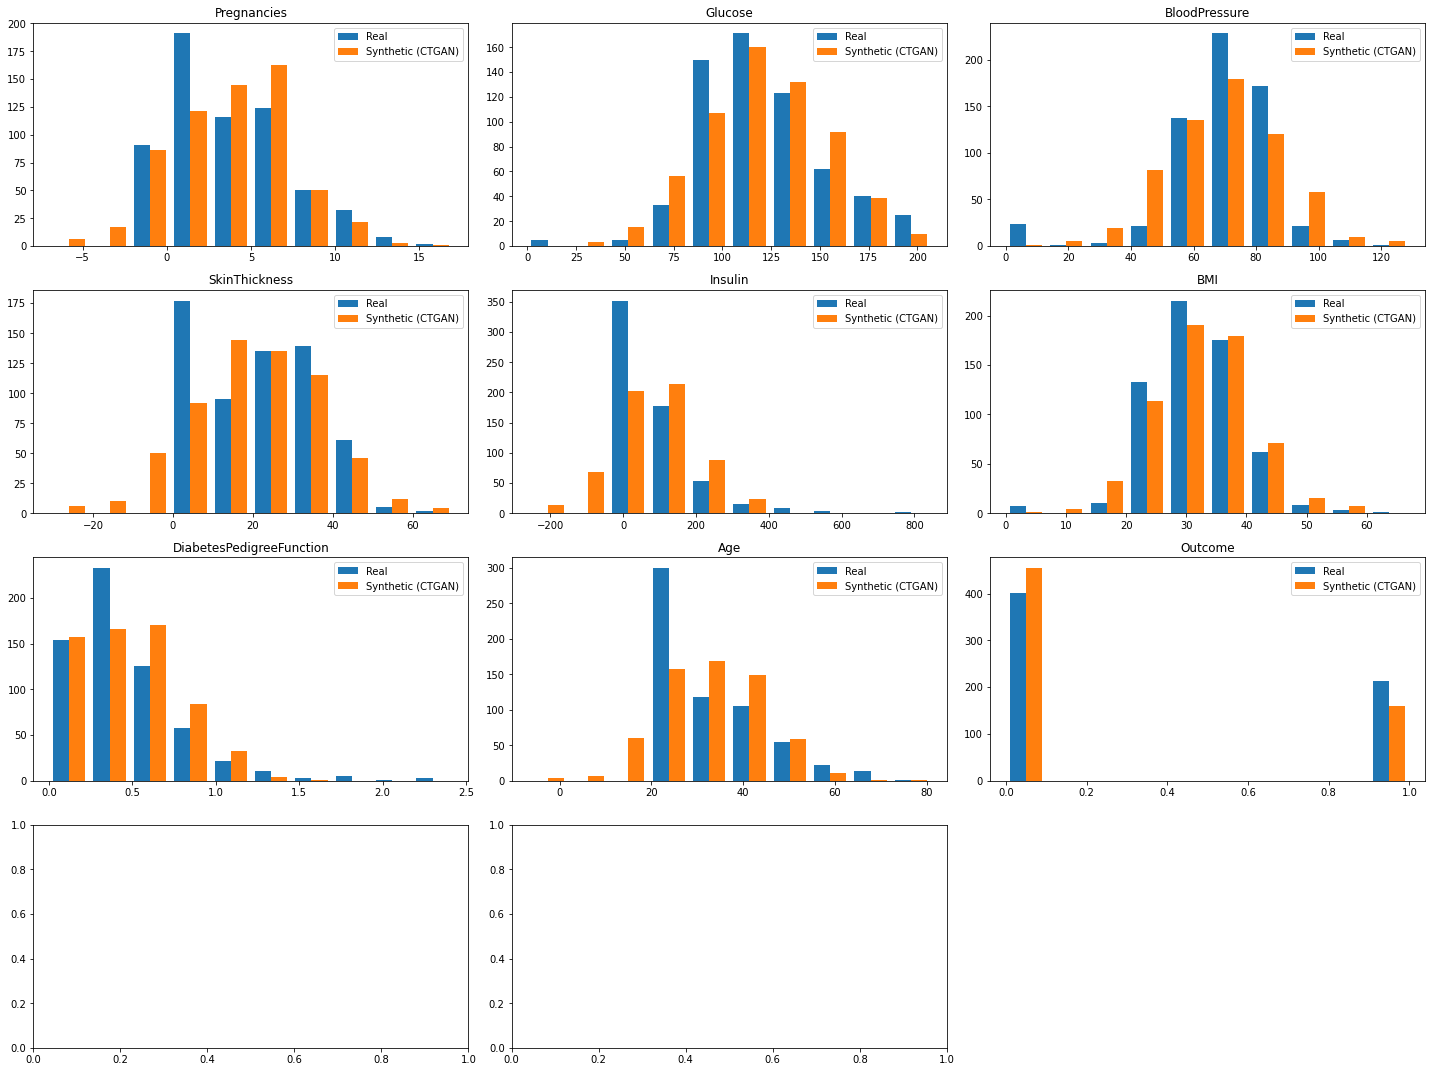

In [12]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (CTGAN)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[3,2])
fig.tight_layout(pad=1.1)

In [13]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)